In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df=pd.read_csv('Datasets\Priceline Interview Take-Home Assessment Data.csv')
df.head()

<>:1: DeprecationWarning: invalid escape sequence '\P'
<>:1: DeprecationWarning: invalid escape sequence '\P'
C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\1502143075.py:1: DeprecationWarning: invalid escape sequence '\P'
  df=pd.read_csv('Datasets\Priceline Interview Take-Home Assessment Data.csv')


,hotel_id,hotel_brand,book_date,check_in,check_out,star_rating,price
0,PMvwpgna7CtZ0T6qQXTWg8t5e3cpBuvTmi03fyml74g=,4.0,5/29/2022,1/8/2023,1/12/2023,NaN,751.80
1,cS/i74U58EtWvS1Ngdt9H5AZSJmSUhEuHQcSGVNC3Xs=,4.0,6/9/2022,1/18/2023,1/26/2023,NaN,3084.84
2,jUkLQRjbZVTB9SLYEb6sTGBakGGzelEPJt2RbGtTk+I=,3.0,5/30/2022,1/7/2023,1/12/2023,NaN,4209.89
3,JX8BO6EgCtMipXf8DFNIxl3N1H9PtlGEZpAykhuehmw=,5.0,5/31/2022,1/6/2023,1/7/2023,2.5,80.55
4,4kzGFcSnNKHV5EUXsGykjPK/vKowpQ+70FcYU+3uIqA=,1.0,6/2/2022,1/24/2023,2/7/2023,3.0,344.72


In [59]:
df.shape

(10000, 7)

In [60]:
df.columns

Index(['hotel_id', 'hotel_brand', 'book_date', 'check_in', 'check_out',
       'star_rating', 'price'],
      dtype='object')

In [61]:
df.nunique()

hotel_id       6015
hotel_brand       5
book_date       169
check_in         72
check_out        72
star_rating       6
price          9150
dtype: int64

In [62]:
df['hotel_brand'].value_counts()

5.0    3149
2.0    2835
3.0    2083
1.0    1248
4.0     645
Name: hotel_brand, dtype: int64

In [63]:
df['hotel_id'].value_counts()

4CQ4I3bji+5hg6U8GGPgOtr4bvIFAuC8adP6cpYahbo=    44
pgezwnWefYhJI4Y+pOc50EIlJm5RQtWMGZJWHqgBxKk=    29
Zp1ZnGQrH9KGtY6SPjqDZ7JJUfxCyvDFdA48NBitCaQ=    23
xSDIP5n53I4Fhj0XY3N4qtRnmOMmv5hEOfmwczLLo/Q=    20
qadJVHzTxcC78IIiToJQWt7IcZKAo+LbZ+2zeTge8Rg=    19
                                                ..
+j6P6L/vo0VUlQfa4aLWmFS7Acce4rOpliuR2jpqYQg=     1
hfMnyXAVVi16i5yxmxfeGZLFPSeoU1yrk1WIBuiK6bs=     1
Q9VU5rMJqv7TU6wfwVKlDDqRYn6Lj3Msluzt5Xim5i4=     1
+j2Iwfa580T5d7jS/sM2ujscCHtnWpHJEnwzMTy+960=     1
GyZjs3nGITOOBrohOPrDGo1e0QOvc9Ec1p/EXVHdv3M=     1
Name: hotel_id, Length: 6015, dtype: int64

In [64]:
# Create a mapping of unique hotel_ids to unique numeric values
hotel_id_mapping = {hotel_id: i+1 for i, hotel_id in enumerate(df['hotel_id'].unique())}

# Map the hotel_ids to their corresponding numeric values
df['hotel_id_numeric'] = df['hotel_id'].map(hotel_id_mapping)

# Display the DataFrame with the new column
print(df[['hotel_id', 'hotel_id_numeric']])


                                          hotel_id  hotel_id_numeric
0     PMvwpgna7CtZ0T6qQXTWg8t5e3cpBuvTmi03fyml74g=                 1
1     cS/i74U58EtWvS1Ngdt9H5AZSJmSUhEuHQcSGVNC3Xs=                 2
2     jUkLQRjbZVTB9SLYEb6sTGBakGGzelEPJt2RbGtTk+I=                 3
3     JX8BO6EgCtMipXf8DFNIxl3N1H9PtlGEZpAykhuehmw=                 4
4     4kzGFcSnNKHV5EUXsGykjPK/vKowpQ+70FcYU+3uIqA=                 5
...                                            ...               ...
9995  KE+hIVrweN6V6buHf3mRD2ZjyYwtucDibHP6k+FSU+g=              6014
9996  tb/pxVGpHZP/JL4jUHxMw47wS+xv1i3st77YOJ24geE=               379
9997  GyZjs3nGITOOBrohOPrDGo1e0QOvc9Ec1p/EXVHdv3M=              6015
9998  8ejfCCh4EaYLXJdYMrVWuMAMTXmDew1YAZVoQRtP5fo=              1119
9999  g44IDGXQ+DLx8nYdeIlwUfUcTvJYkfZ52wU90XY4Q5M=              1025

[10000 rows x 2 columns]


In [65]:
# Drop the original hotel_id column
df.drop('hotel_id', axis=1, inplace=True)

# Rename the hotel_id_numeric column to hotel_id
df.rename(columns={'hotel_id_numeric': 'hotel_id'}, inplace=True)

# Display the DataFrame with the updated column name
print(df)

      hotel_brand  book_date   check_in  check_out  star_rating    price  \
0             4.0  5/29/2022   1/8/2023  1/12/2023          NaN   751.80   
1             4.0   6/9/2022  1/18/2023  1/26/2023          NaN  3084.84   
2             3.0  5/30/2022   1/7/2023  1/12/2023          NaN  4209.89   
3             5.0  5/31/2022   1/6/2023   1/7/2023          2.5    80.55   
4             1.0   6/2/2022  1/24/2023   2/7/2023          3.0   344.72   
...           ...        ...        ...        ...          ...      ...   
9995          3.0  2/10/2023  3/10/2023  3/11/2023          3.0   198.46   
9996          5.0  2/11/2023  3/10/2023  3/12/2023          4.5   669.06   
9997          5.0  2/10/2023  3/10/2023  3/11/2023          4.0   334.52   
9998          2.0   2/8/2023  3/10/2023  3/11/2023          NaN   643.82   
9999          1.0  2/11/2023  3/10/2023  3/13/2023          2.5   218.15   

      hotel_id  
0            1  
1            2  
2            3  
3            4  
4 

In [66]:
df['star_rating'].value_counts()

3.5    2303
2.5    1600
4.0    1536
3.0    1477
4.5     821
2.0       4
Name: star_rating, dtype: int64

In [67]:
df['price'].value_counts()

157.25    4
130.05    4
71.62     4
118.70    4
161.11    4
         ..
284.24    1
773.60    1
329.11    1
284.95    1
218.15    1
Name: price, Length: 9150, dtype: int64

<Axes: xlabel='hotel_brand', ylabel='count'>

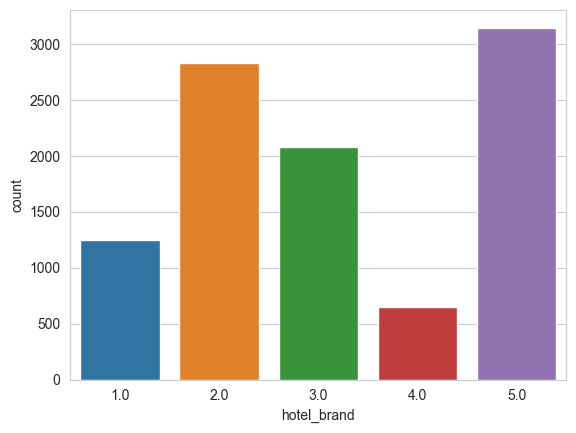

In [68]:
sns.countplot(data=df, x='hotel_brand')

<Axes: xlabel='star_rating', ylabel='count'>

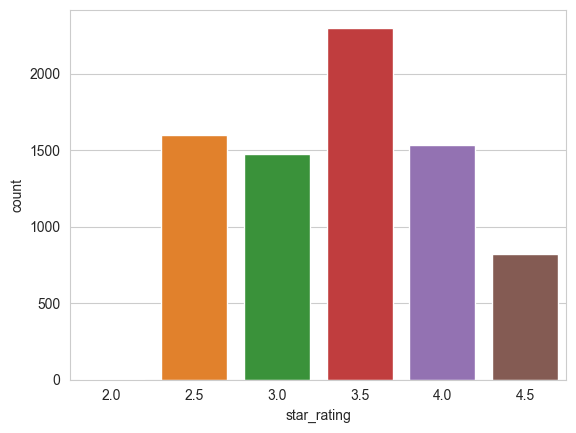

In [69]:
sns.countplot(data=df, x='star_rating')

Identify Missing Values

In [70]:
df.isnull().sum()

hotel_brand      40
book_date        10
check_in         10
check_out        10
star_rating    2259
price            10
hotel_id          0
dtype: int64

In [71]:
df.fillna(0,inplace=True)

In [72]:
df.isnull().sum()

hotel_brand    0
book_date      0
check_in       0
check_out      0
star_rating    0
price          0
hotel_id       0
dtype: int64

In [73]:
#subset=df[(df['hotel_id']==0)& (df['hotel_brand']==0)& (df['book_date']==0)& (df['check_in']==0) & (df['check_out']==0)& (df['star_rating']==0)& (df['price']==0)]

In [74]:
#subset[['hotel_id','hotel_brand', 'book_date', 'check_in', 'check_out','star_rating', 'price']]

In [75]:
# type(subset)

In [76]:
#delete=(df['hotel_id']==0)& (df['hotel_brand']==0)& (df['book_date']==0)& (df['check_in']==0) & (df['check_out']==0)& (df['star_rating']==0)& (df['price']==0)

In [77]:
#type(delete)

df1=df[~delete]
df1

In [78]:
df.head()

,hotel_brand,book_date,check_in,check_out,star_rating,price,hotel_id
0,4.0,5/29/2022,1/8/2023,1/12/2023,0.0,751.80,1
1,4.0,6/9/2022,1/18/2023,1/26/2023,0.0,3084.84,2
2,3.0,5/30/2022,1/7/2023,1/12/2023,0.0,4209.89,3
3,5.0,5/31/2022,1/6/2023,1/7/2023,2.5,80.55,4
4,1.0,6/2/2022,1/24/2023,2/7/2023,3.0,344.72,5


In [79]:
# df['hotel_id_numeric'].value_counts()

In [80]:
# sns.countplot(data=df, x='hotel_id_numeric')

ValueError: Could not interpret input 'hotel_id_numeric'

In [81]:
df.describe()

,hotel_brand,star_rating,price,hotel_id
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,3.14920,2.633800,429.175958,2542.734900
std,1.45628,1.528244,745.299589,1734.347294
min,0.00000,0.000000,0.000000,1.000000
25%,2.00000,2.500000,143.510000,1012.750000
50%,3.00000,3.000000,227.635000,2324.000000
75%,5.00000,3.500000,415.205000,3981.250000
max,5.00000,4.500000,16655.390000,6015.000000


In [82]:
df.corr()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,hotel_brand,star_rating,price,hotel_id
hotel_brand,1.000000,-0.185327,0.119142,-0.110840
star_rating,-0.185327,1.000000,-0.229409,0.185704
price,0.119142,-0.229409,1.000000,-0.146872
hotel_id,-0.110840,0.185704,-0.146872,1.000000


In [83]:
df.columns

Index(['hotel_brand', 'book_date', 'check_in', 'check_out', 'star_rating',
       'price', 'hotel_id'],
      dtype='object')

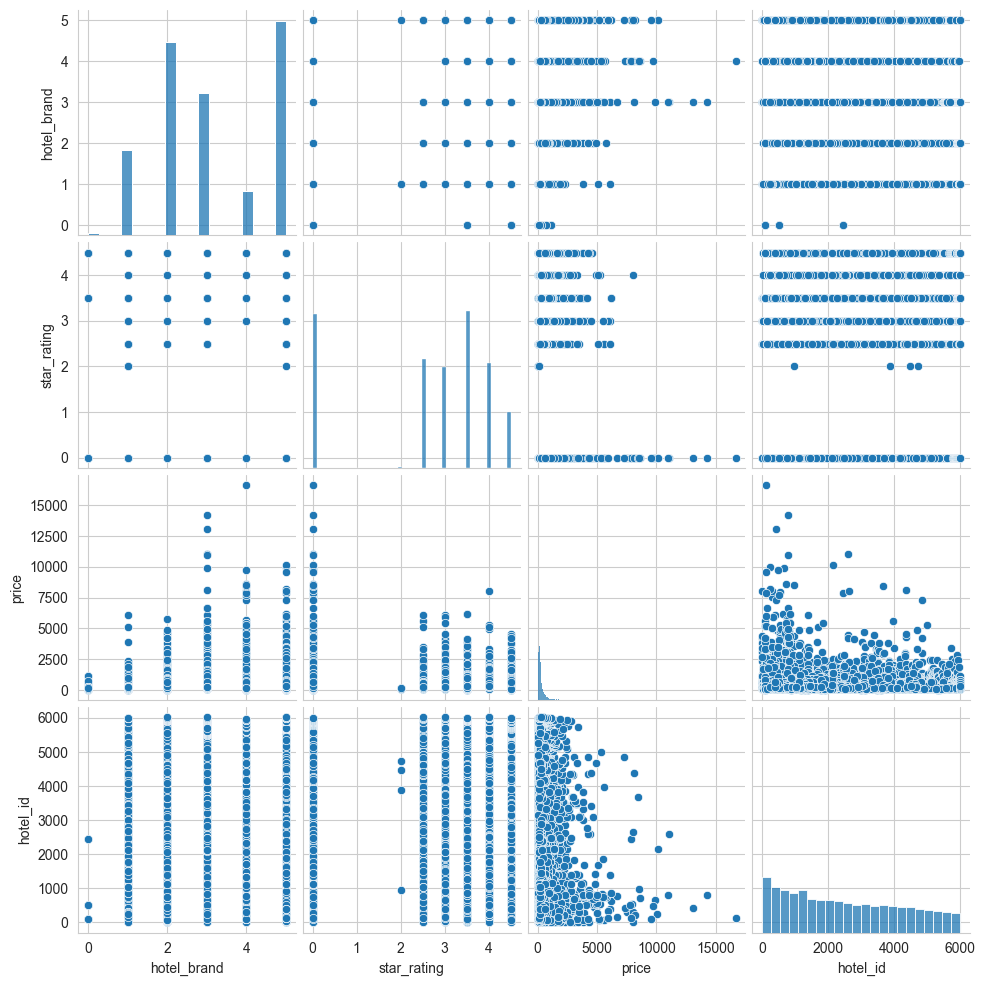

In [84]:
# Pairplot for visualizing relationships between numerical variables
sns.pairplot(df)
plt.show()



C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\1137966132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


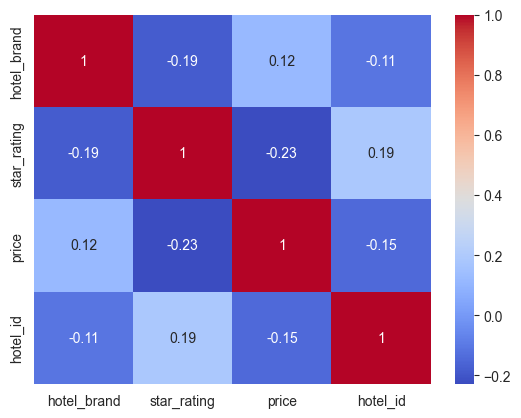

In [85]:
# Heatmap for visualizing correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### From above heatmap it can be conclude that there is a negative correlation between hotel_brand and star rating. means that even though the hotel is branded it is not alway got highly rated.
#### and also price increased when hotel brand is greater.
#### negative relation betn price and star rating. even though price is higher, customer rating was low.

In [86]:
# Calculate the correlation between hotel_brand and price
correlation = df['hotel_brand'].corr(df['price'])

print("Correlation between hotel_brand and price:", correlation)

Correlation between hotel_brand and price: 0.11914198371043987


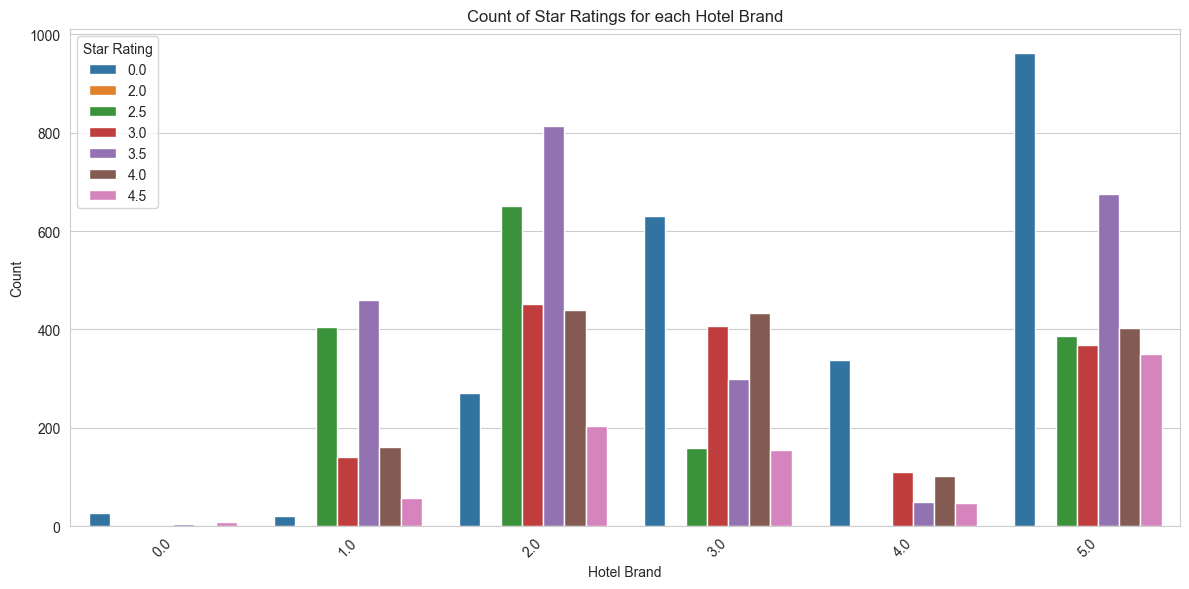

In [98]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='hotel_brand', hue='star_rating',data=df)
plt.title('Count of Star Ratings for each Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Star Rating')
plt.tight_layout()
plt.show()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9990 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hotel_brand  9990 non-null   float64       
 1   book_date    9990 non-null   datetime64[ns]
 2   check_in     9990 non-null   object        
 3   check_out    9990 non-null   object        
 4   star_rating  9990 non-null   float64       
 5   price        9990 non-null   float64       
 6   hotel_id     9990 non-null   int64         
 7   book_year    9990 non-null   period[A-DEC] 
dtypes: datetime64[ns](1), float64(3), int64(1), object(2), period[A-DEC](1)
memory usage: 702.4+ KB


In [99]:
df[df[''] == 0.0]

,hotel_brand,book_date,check_in,check_out,star_rating,price,hotel_id,book_year
0,4.0,2022-05-29,1/8/2023,1/12/2023,0.0,751.80,1,2022
1,4.0,2022-06-09,1/18/2023,1/26/2023,0.0,3084.84,2,2022
2,3.0,2022-05-30,1/7/2023,1/12/2023,0.0,4209.89,3,2022
6,5.0,2022-03-16,1/24/2023,1/30/2023,0.0,8011.65,7,2022
7,3.0,2022-05-28,1/10/2023,1/19/2023,0.0,970.72,8,2022
...,...,...,...,...,...,...,...,...
9973,3.0,2023-03-06,3/10/2023,3/12/2023,0.0,1097.61,2483,2023
9974,5.0,2023-03-07,3/10/2023,3/12/2023,0.0,569.08,4176,2023
9987,5.0,2023-03-07,3/10/2023,3/11/2023,0.0,138.40,1133,2023
9990,5.0,2023-03-07,3/10/2023,3/12/2023,0.0,306.75,1439,2023


In [88]:
import warnings

# Ignore specific warning category
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Reset warnings to default behavior (optional)
warnings.resetwarnings()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\3399711704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_date'] = pd.to_datetime(df['book_date'])
C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\3399711704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_year'] = df['book_date'].dt.to_period('Y')


{Period('2022', 'A-DEC'): array([   0,    1,    2, ..., 9899, 9983, 9984], dtype=int64), Period('2023', 'A-DEC'): array([ 164,  165,  166, ..., 9987, 9988, 9989], dtype=int64)}


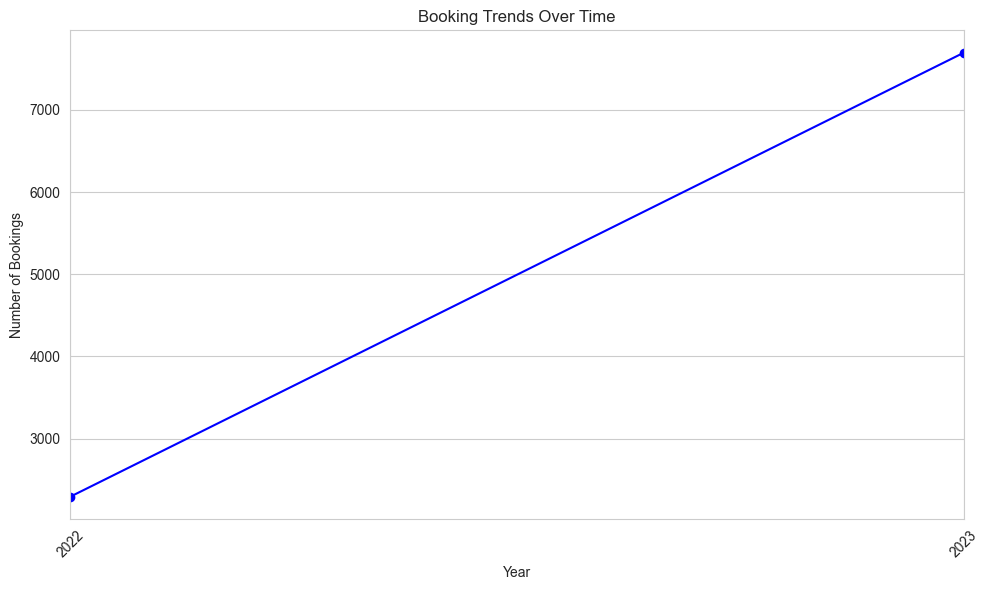

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and 'book_date' is in datetime format
# Convert 'book_date' column to datetime format if not already done
df['book_date'] = pd.to_datetime(df['book_date'])

# Extract month and year from 'book_date'
df['book_year'] = df['book_date'].dt.to_period('Y')
print(df.groupby('book_year').indices)
# Group by month and count the number of bookings
booking_trend = df.groupby('book_year').size()

# Plot the booking trend over time
plt.figure(figsize=(10, 6))
booking_trend.plot(kind='line', marker='o', color='b')
plt.title('Booking Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\1321834800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_date'] = pd.to_datetime(df['book_date'])
C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\1321834800.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_year'] = df['book_date'].dt.to_period('Y')


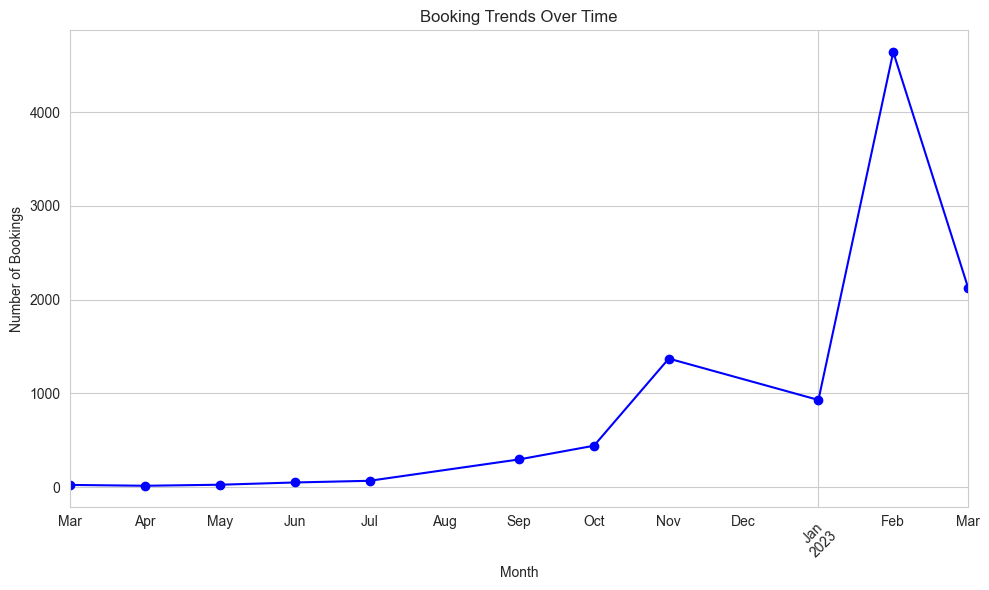

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and 'book_date' is in datetime format
# Convert 'book_date' column to datetime format if not already done
df['book_date'] = pd.to_datetime(df['book_date'])

# Extract month and year from 'book_date'
df['book_year'] = df['book_date'].dt.to_period('Y')

df1 = df[(df['book_year'] <= pd.Period('2023', freq='A-DEC')) & (df['book_year'] >= pd.Period('2020', freq='A-DEC')) ]
df1['book_month'] = df1['book_date'].dt.to_period('M')
# Group by month and year and count the number of bookings
booking_trend = df1.groupby('book_month').size()

# Plot the booking trend over time
plt.figure(figsize=(10, 6))
booking_trend.plot(kind='line', marker='o', color='b')
plt.title('Booking Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [94]:
df = df[df['book_year'] != pd.Period('1970', freq='A-DEC')]

In [95]:
df[df['book_year']== pd.Period('1970', freq='A-DEC')]

,hotel_brand,book_date,check_in,check_out,star_rating,price,hotel_id,book_year


In [103]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(10,8))
sns.countplot(x='hotel_brand', hue='price', data=df)
plt.title('Count of price for each Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Price')
plt.tight_layout()
plt.show()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\2263400453.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\2263400453.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\SPURUSHO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 843x191746 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x800 with 1 Axes>

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\2985733371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_date'] = pd.to_datetime(df['book_date'])
C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\2985733371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_year'] = df['book_date'].dt.year
C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_43612\2985733371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

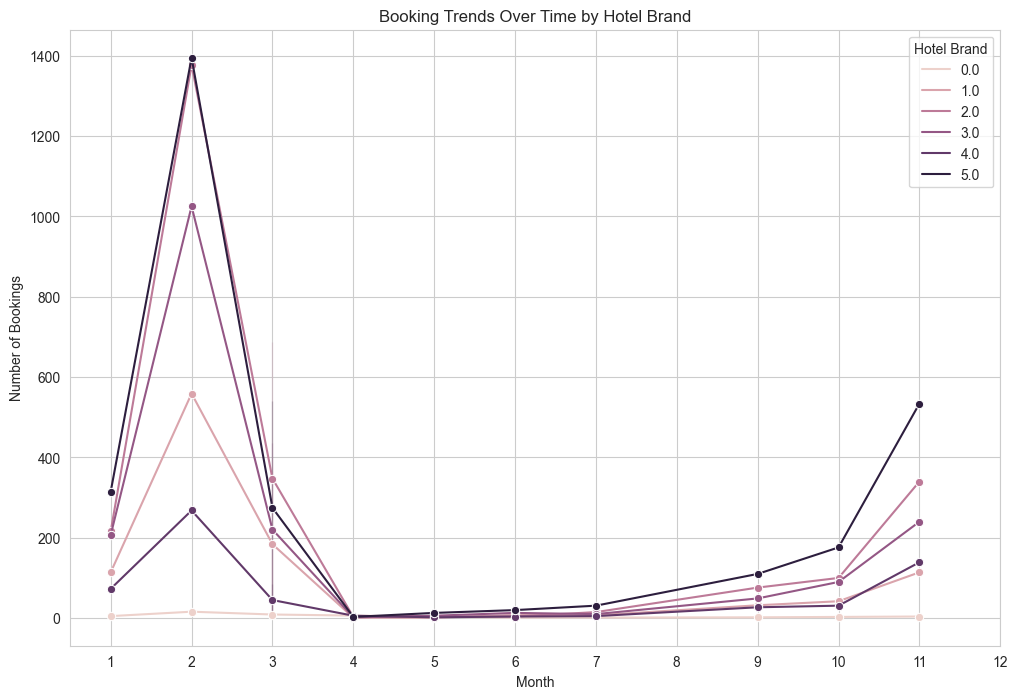

In [101]:
# Convert 'book_date' to datetime format
df['book_date'] = pd.to_datetime(df['book_date'])

# Extract year and month from 'book_date'
df['book_year'] = df['book_date'].dt.year
df['book_month'] = df['book_date'].dt.month

# Group by 'hotel_brand' and 'book_year', 'book_month' to count bookings
booking_counts = df.groupby(['hotel_brand', 'book_year', 'book_month']).size().reset_index(name='booking_count')

# Plot booking trends for each hotel brand
plt.figure(figsize=(12, 8))
sns.lineplot(data=booking_counts, x='book_month', y='booking_count', hue='hotel_brand', marker='o')
plt.title('Booking Trends Over Time by Hotel Brand')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel Brand', loc='upper right')
plt.xticks(range(1, 13))  # Assuming bookings span all months of the year
plt.show()

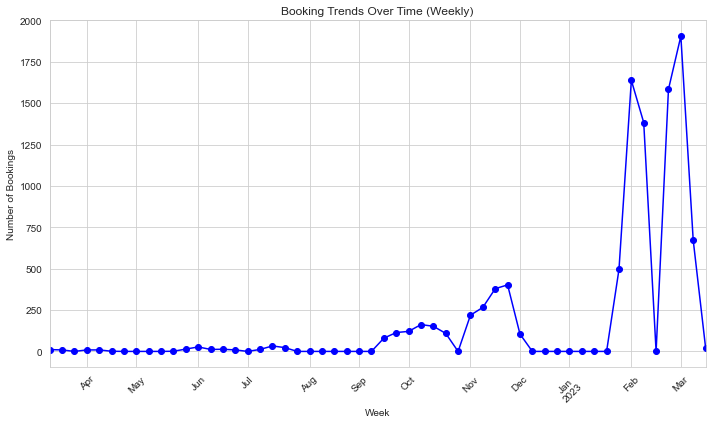

In [ ]:
df['book_date'] = pd.to_datetime(df['book_date'])

# Set 'book_date' as the index of the DataFrame
df.set_index('book_date', inplace=True)

# Resample the DataFrame to group by week and count the number of bookings
booking_trend_weekly = df.resample('W').size()

# Plot the booking trend over time
plt.figure(figsize=(10, 6))
booking_trend_weekly.plot(kind='line', marker='o', color='b')
plt.title('Booking Trends Over Time (Weekly)')
plt.xlabel('Week')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

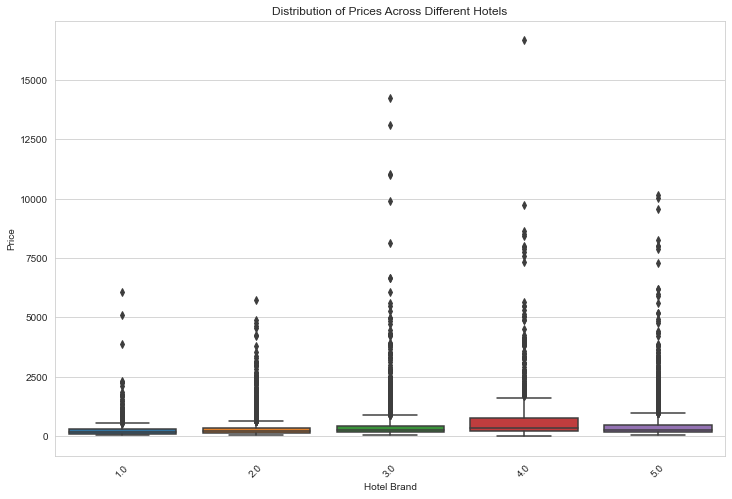

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a boxplot or violin plot to examine the distribution of prices
# across different hotels and booking dates
sns.boxplot(x='hotel_brand', y='price', data=df)
# sns.violinplot(x='hotel_brand', y='price', data=df)

# Set the title and labels
plt.title('Distribution of Prices Across Different Hotels')
plt.xlabel('Hotel Brand')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

Star ratings frequency

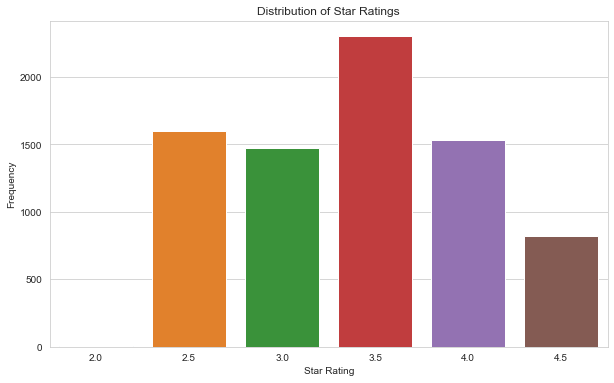

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a countplot or histogram to investigate the distribution of star ratings
sns.countplot(x='star_rating', data=df)

# Set the title and labels
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')

# Show plot
plt.show()

Distribution of Duration of Stay in days

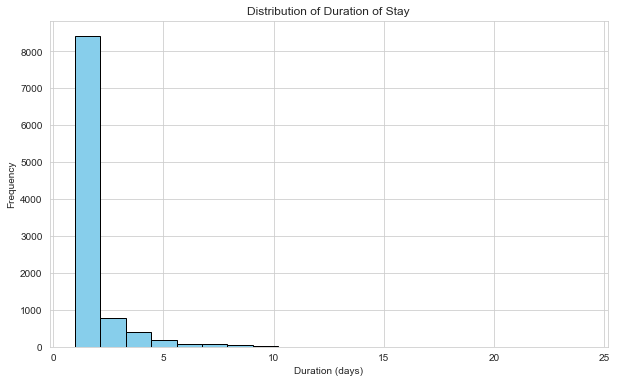

In [ ]:
# Convert 'check_in' and 'check_out' columns to datetime format
df['check_in'] = pd.to_datetime(df['check_in'])
df['check_out'] = pd.to_datetime(df['check_out'])

# Calculate the duration of stay
df['duration_stay'] = (df['check_out'] - df['check_in']).dt.days

# Plot a histogram to visualize the distribution of duration of stay
plt.figure(figsize=(10, 6))
plt.hist(df['duration_stay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration of Stay')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Look for correlations between attributes such as price and star rating, or booking date and hotel brand, to uncover any relationships between them.

C:\Users\44788\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\44788\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


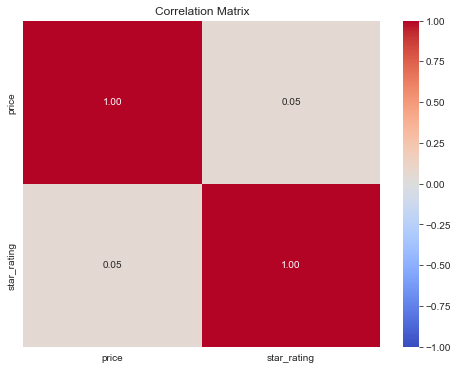

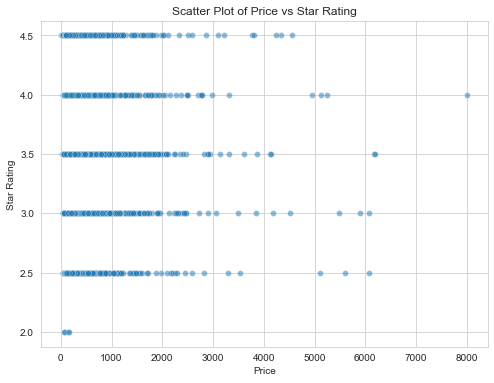

In [ ]:
# Drop rows with missing values in 'price' and 'star_rating' columns
df_cleaned = df.dropna(subset=['price', 'star_rating'])

# Calculate correlation matrix
correlation_matrix = df_cleaned[['price', 'star_rating']].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot between 'price' and 'star_rating'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='price', y='star_rating', alpha=0.5)
plt.title('Scatter Plot of Price vs Star Rating')
plt.xlabel('Price')
plt.ylabel('Star Rating')
plt.show()

In [ ]:
# Extract year and month from 'book_date'
df['book_year'] = df['book_date'].dt.year
df['book_month'] = df['book_date'].dt.month

# Group by 'hotel_brand' and 'book_year', 'book_month' to count bookings
booking_counts = df.groupby(['hotel_brand', 'book_year', 'book_month']).size().reset_index(name='booking_count')

# Plot booking trends for each hotel brand
plt.figure(figsize=(12, 8))
sns.lineplot(data=booking_counts, x='book_month', y='booking_count', hue='hotel_brand', marker='o')
plt.title('Booking Trends Over Time by Hotel Brand')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel Brand', loc='upper right')
plt.xticks(range(1, 13))  # Assuming bookings span all months of the year
plt.show()

KeyError: 'book_date'

In [ ]:
df.columns

Index(['hotel_brand', 'check_in', 'check_out', 'star_rating', 'price',
       'book_month', 'duration_stay'],
      dtype='object')